## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [12]:
## 資料前處理
#1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [13]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0724 13:19:08.433377 4566574528 deprecation_wrapper.py:118] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [16]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [17]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0724 13:19:14.154772 4566574528 deprecation_wrapper.py:118] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [18]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0724 13:19:39.988346 4566574528 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1251: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 185us/step - loss: 1.9688 - acc: 0.2743 - val_loss: 1.7749 - val_acc: 0.3604
Epoch 2/100
50000/50000 [==============================] - 8s 170us/step - loss: 1.7235 - acc: 0.3801 - val_loss: 1.7153 - val_acc: 0.3846
Epoch 3/100
50000/50000 [==============================] - 9s 173us/step - loss: 1.6461 - acc: 0.4092 - val_loss: 1.6015 - val_acc: 0.4155
Epoch 4/100
50000/50000 [==============================] - 9s 174us/step - loss: 1.5739 - acc: 0.4339 - val_loss: 1.5250 - val_acc: 0.4512
Epoch 5/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.5262 - acc: 0.4503 - val_loss: 1.5272 - val_acc: 0.4539
Epoch 6/100
50000/50000 [==============================] - 9s 187us/step - loss: 1.4874 - acc: 0.4663 - val_loss: 1.5209 - val_acc: 0.4588
Epoch 7/100
50000/50000 [==============================] - 11s 216us/step - loss: 1.4624 - acc: 0.4759 - val_loss: 1

Epoch 59/100
50000/50000 [==============================] - 10s 209us/step - loss: 0.5583 - acc: 0.8005 - val_loss: 2.0414 - val_acc: 0.5170
Epoch 60/100
50000/50000 [==============================] - 11s 225us/step - loss: 0.5540 - acc: 0.8019 - val_loss: 2.0251 - val_acc: 0.5178
Epoch 61/100
50000/50000 [==============================] - 13s 265us/step - loss: 0.5180 - acc: 0.8153 - val_loss: 2.1049 - val_acc: 0.5112
Epoch 62/100
50000/50000 [==============================] - 12s 250us/step - loss: 0.5311 - acc: 0.8083 - val_loss: 2.0918 - val_acc: 0.5107
Epoch 63/100
50000/50000 [==============================] - 10s 190us/step - loss: 0.5220 - acc: 0.8132 - val_loss: 2.0821 - val_acc: 0.5087
Epoch 64/100
50000/50000 [==============================] - 9s 177us/step - loss: 0.5097 - acc: 0.8155 - val_loss: 2.1397 - val_acc: 0.5119
Epoch 65/100
50000/50000 [==============================] - 10s 194us/step - loss: 0.5083 - acc: 0.8174 - val_loss: 2.2041 - val_acc: 0.5121
Epoch 66/100
5

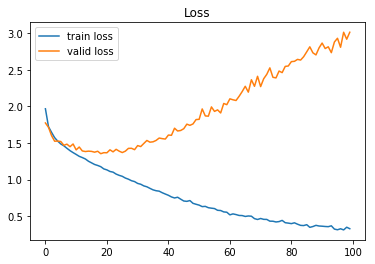

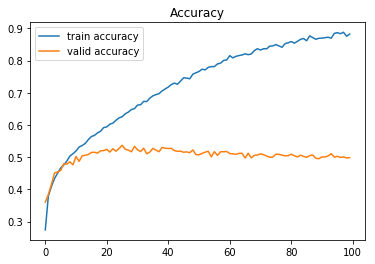

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [4]:
print(train)

(array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
       

In [8]:
x_train, y_train = train
x_train = preproc_x(x_train)

print(x_train)

[[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]
 [0.60392157 0.69411765 0.73333333 ... 0.56078431 0.52156863 0.56470588]
 [1.         1.         1.         ... 0.31372549 0.3372549  0.32941176]
 ...
 [0.1372549  0.69803922 0.92156863 ... 0.04705882 0.12156863 0.19607843]
 [0.74117647 0.82745098 0.94117647 ... 0.76470588 0.74509804 0.67058824]
 [0.89803922 0.89803922 0.9372549  ... 0.63921569 0.63921569 0.63137255]]
